# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [1]:
import pandas as pd
import numpy as np
import folium


In [2]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv('../../DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels

X_train = X[X['pickup_year'] < 2015]

y_train=X_train['fare_amount']
X_train = X_train.drop(['fare_amount'], axis=1)

X_test = X[X['pickup_year'] == 2015]

y_test=X_test['fare_amount']
X_test = X_test.drop(['fare_amount'], axis=1)


In [99]:
# a quick look at the data
X_test.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
28,22.54,-74.010483,40.717667,-73.985771,40.660366,1,21,21,0,6,...,1,0,0,0,0,1,0,0,0,0
32,58.00,-73.983330,40.738720,-73.933197,40.847225,1,11,3,0,1,...,1,0,0,0,0,0,1,0,0,0
33,4.50,-73.990173,40.756447,-73.985619,40.762829,1,12,8,4,3,...,1,0,0,0,0,0,1,0,0,0
65,11.50,-73.979279,40.723438,-74.004608,40.746948,6,12,10,0,4,...,1,0,0,0,0,0,1,0,0,0
66,5.00,-73.954796,40.779335,-73.944931,40.780087,1,12,23,2,5,...,1,0,0,0,0,0,1,0,0,0


In [5]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

### E 2.1 Split data into train and test data
* use data from 2009-2014 for training and 2015 for evaluation


-> Direkt oben beim Einlesen gemacht.

### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

regr = RandomForestRegressor(n_jobs=-1)
regr.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [5]:
print('MSE Train:', mean_squared_error(y_train, regr.predict(X_train)))
print('MSE Test: ', mean_squared_error(y_test, regr.predict(X_test)))

MSE Train: 2.373500554334911
MSE Test:  21.403256758354615


In [6]:
pred = regr.predict(X_test)

In [7]:
predicted = list()
actual = list()
for i in range(len(y_test)):
    if np.absolute(pred[i] - y_test.iloc[i]) > 15: 
        predicted.append(pred[i])
        actual.append(y_test.iloc[i])

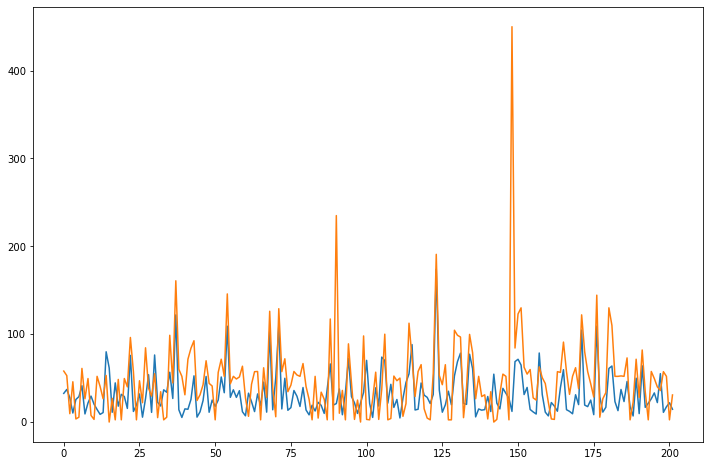

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(predicted)
ax.plot(actual)

plt.show()